waveform 으로써의 오디오

In [ ]:
%pip install librosa

Note: you may need to restart the kernel to use updated packages.


오디오 시계열(array)와 샘플링 속도(sampling_rate) 튜플

In [2]:
import librosa
array, sampling_rate = librosa.load(librosa.ex("trumpet"))

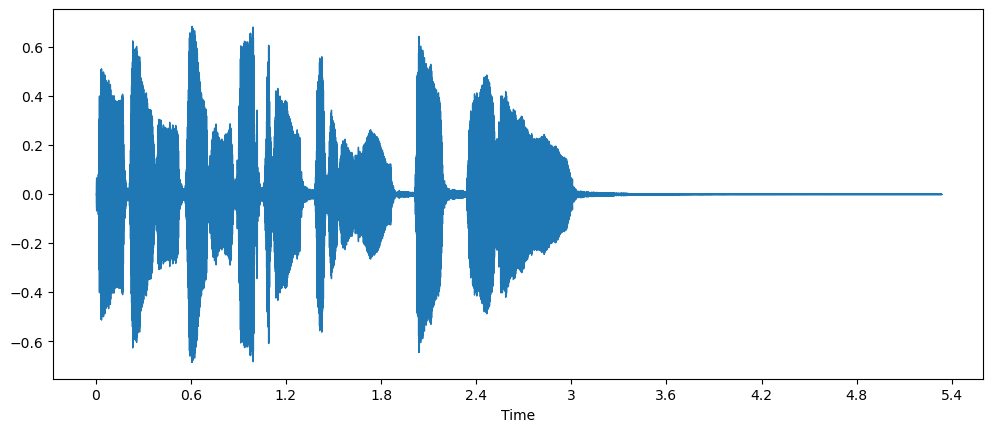

In [3]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure().set_figwidth(12)
librosa.display.waveshow(array,sr = sampling_rate)

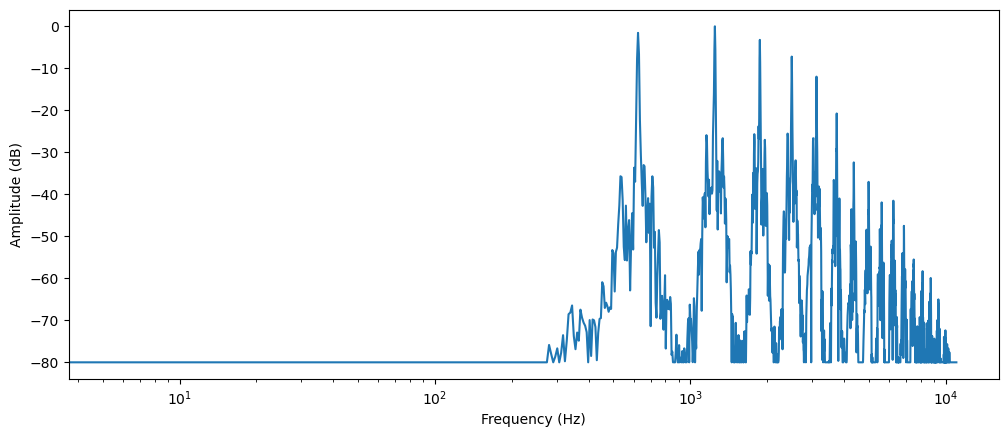

In [7]:
import numpy as np

dft_input = array[:4096]

#Calculate Discrete Fourier Transform(DFT)
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input) #Complex value

#Get the amplitude spectrum in decibels
amplitude = np.abs(dft) #calculate magnitude to convert complex to float 
amplitude_db = librosa.amplitude_to_db(amplitude,ref=np.max) #convert Linear scale(0.0~1.0) to Log scale


#Get the frequency bins
frequency = librosa.fft_frequencies(sr = sampling_rate, n_fft = len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

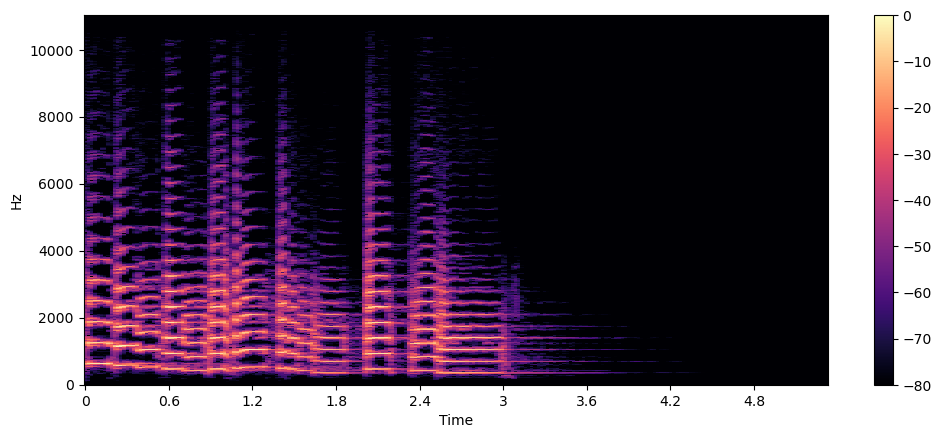

In [ ]:
# Trumpet STFT Spectrogram
D = librosa.stft(array) #Divide the audio signal into 2048 samples
S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis = "time", y_axis="hz")
plt.colorbar()

n_mels : mel band의 수 (mel band:필터를 이용해 스펙트럼을 지각적으로 의미있는 요소로 나누는 주파수 범위의 집합), 보통 40 or 80

fmax : 우리가 관심을 가지는 최고 주파수(Hz 단위)

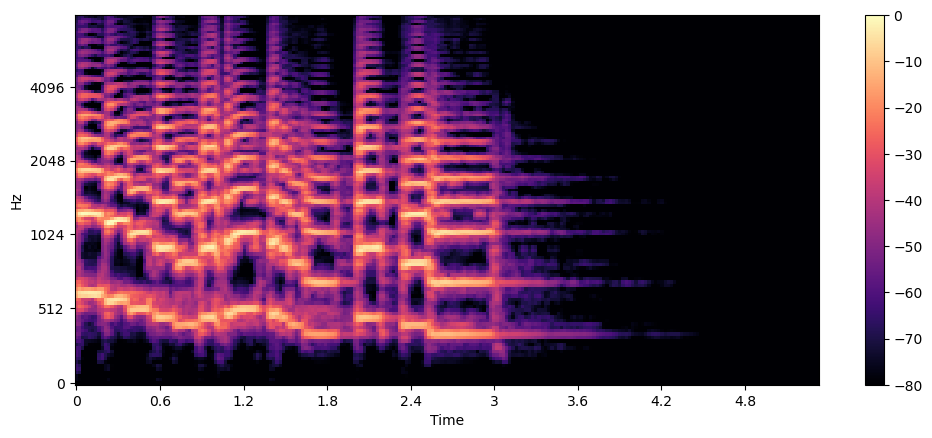

In [ ]:

#Trumpet Mel Spectrogram
S = librosa.feature.melspectrogram(y = array, sr=sampling_rate,n_mels=128, fmax=8000)
#return power spectrogram
S_dB = librosa.power_to_db(S,ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time",y_axis="mel",sr=sampling_rate,fmax=8000)
plt.colorbar()

### resampling audio data

In [ ]:
%pip install datasets

In [7]:
from datasets import load_dataset, Audio

minds = load_dataset("PolyAI/minds14", name="en-US", split="train")

8kHz로 샘플링 된 MINDS-14 데이터셋을 16kHz로 리샘플링

In [9]:
minds = minds.cast_column("audio", Audio(sampling_rate = 16_000))
minds[0]

{'path': 'en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
 'audio': {'path': '602ba55abb1e6d0fbce92065.wav',
  'array': array([ 1.70561689e-05,  2.18727393e-04,  2.28099860e-04, ...,
          3.43842403e-05, -5.96366226e-06, -1.76846370e-05]),
  'sampling_rate': 16000},
 'transcription': 'I would like to set up a joint account with my partner',
 'english_transcription': 'I would like to set up a joint account with my partner',
 'intent_class': 11,
 'lang_id': 4}

만약 오디오 신호가 8kHz로 샘플링 되었으면 4kHz보다 높은 주파수는 없음(나이퀴스트 샘플링 정리에 의해)

-> 업샘플링은 이 커브를 근사하여 기존 점들 사이의 값을 찾아내면 됨

-> 다운샘플링은 새로운 나이퀴스트 한계보다 높은 주파수를 버려 왜곡이 생길 수 있음 (이때의 왜곡 : alias)